Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Clai101"

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [47]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    x_np1 = x0
    x_n = x0 + 2 * complex(eps, eps)
    i = 0

    while abs(x_np1 - x_n) >= eps and i < maxiter:
        x_n = x_np1
        x_np1 = x_n - f(x_n) / fder(x_n)

        i += 1
    return x_np1, i

In [48]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

<function matplotlib.pyplot.show(close=None, block=None)>

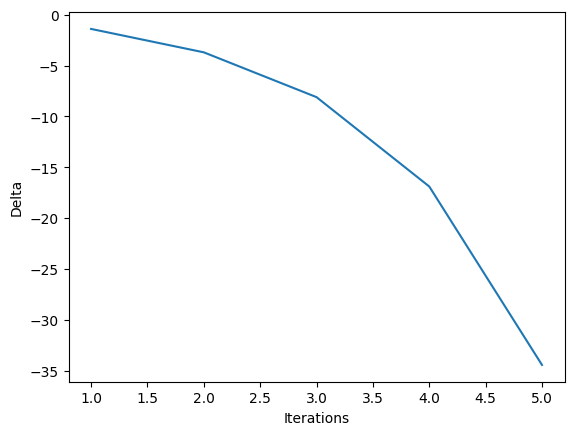

In [6]:
diff = []
it = []
for i in range(1, 10):
    x, count = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, 2, maxiter = i)
    diff.append(abs(x - 1))
    it.append(count)

plt.plot(it, np.log(diff))
plt.ylabel("Delta")
plt.xlabel("Iterations")
plt.show

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [7]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    x = 0
    xn = x0
    i = 0
    while (abs(x - xn) > eps and (i < maxiter)):
        x = xn
        xn = x - m*f(x)/fder(x)
        i += 1
    return xn, i

In [8]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [12]:
diff = []
it = []
for i in range(1, 7):
    x, count = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 4 * (x**2 - 1) * x, 2, i, eps = 10e-10, maxiter = 10**7)
    print(f'm = {i} | iter = {count}')


m = 1 | iter = 31
m = 2 | iter = 6
m = 3 | iter = 30
m = 4 | iter = 10000000
m = 5 | iter = 10000000
m = 6 | iter = 10000000


# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


[ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]


c:\Users\Xiaomi\source\repos\PytHSEPr\PytHSEPr\HSE_inv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in cdouble_scalars
  
c:\Users\Xiaomi\source\repos\PytHSEPr\PytHSEPr\HSE_inv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in cdouble_scalars
  


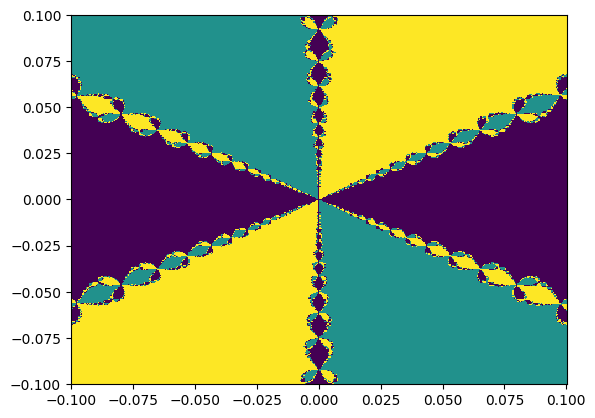

In [49]:
real_root = np.array([np.exp(1j*2*i*np.pi/3) for i in range(0, 3)])
print(real_root)

x, y = np.meshgrid(np.linspace(-0.1, 0.1, 401), np.linspace(-0.1, 0.1, 401))

initial= x+1j*y
results=np.zeros_like(initial, dtype=float)

for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        find_root = abs(real_root - newton_iteration(lambda x: x**3 - 1, lambda x: 3 * x ** 2, initial[i,j],eps= 0.001 ,  maxiter=50)[0])
        results[i,j] = np.argmin(find_root)

plt.pcolormesh(x, y, results)
plt.show()

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [50]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    px = X0 + eps * 2
    x = X0
    count = 0

    while np.linalg.norm(x - px) >= eps and count < maxiter:
        px = x
        x = x + np.linalg.solve(jcb(x), -F(x))
        count += 1
    
    return x, count

In [51]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [52]:
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    eps = 1e-10
    J = np.zeros((3,3))
    for i in range(3):
        d = np.zeros(3)
        d[i] += eps
        J[i] = (func2(X + d) - func2(X)) / eps  
            
    return J.T

In [53]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [ ]:
# more testing in this cell, keep it intact
